#  Applied Machine Learning 

## Homework 3: Preprocessing 


## Table of Contents

- [Instructions](#si)
- [Introduction](#in)
- [Exercise 1: Introducing the dataset](#1)
- [Exercise 2: Exploratory data analysis (EDA)](#2)
- [Exercise 3: Preprocessing](#3)
- [Exercise 4: Building models](#4)
- [Exercise 5: Evaluating on the test set](#5)

## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset <a name="1"></a>
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [2]:
census_df = pd.read_csv("adult.csv")
census_df.shape

(32561, 15)

In [3]:
census_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
census_df = census_df.drop('education',axis=1)

In [5]:
census_df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<br><br>

### 1.1 Data splitting 
rubric={points:4}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (60%) and `test_df` (40%) with `random_state = 42`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 60%/40% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_

In [6]:
train_df, test_df = train_test_split(census_df, test_size=0.40, random_state=42)
X_train, y_train = (
    train_df.drop(columns=["income"]),
    train_df["income"],
)
X_test, y_test = (
    test_df.drop(columns=["income"]),
    test_df["income"],
)

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [7]:
train_df.sort_index()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,84661,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [8]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(19536, 14)

In [9]:
train_df_nan.sort_index()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,84661,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 Visualizing features
rubric={points:10}

**Your tasks:**

1. Examine the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. In case of `.describe()`, use the `include="all"` argument to show summary statistics of all  features.
2. Visualize the histograms of numeric features. 
3. From the visualizations, which features seem relevant for the given prediction task?

> Note: (Optional) If you're feeling excited about this you are welcome to use [`pandas_profiling`](https://github.com/pandas-profiling/pandas-profiling) for more elaborate visualization and EDA. 

In [10]:
train_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19536 entries, 25823 to 23654
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19536 non-null  int64 
 1   workclass       18428 non-null  object
 2   fnlwgt          19536 non-null  int64 
 3   education.num   19536 non-null  int64 
 4   marital.status  19536 non-null  object
 5   occupation      18424 non-null  object
 6   relationship    19536 non-null  object
 7   race            19536 non-null  object
 8   sex             19536 non-null  object
 9   capital.gain    19536 non-null  int64 
 10  capital.loss    19536 non-null  int64 
 11  hours.per.week  19536 non-null  int64 
 12  native.country  19187 non-null  object
 13  income          19536 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB


In [11]:
train_df_nan.describe(include="all")

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,19536.000000,18428,1.953600e+04,19536.000000,19536,18424,19536,19536,19536,19536.000000,19536.000000,19536.000000,19187,19536
unique,NaN,8,NaN,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,13570,NaN,NaN,9025,2490,7937,16676,13079,NaN,NaN,NaN,17517,14841
mean,38.592547,NaN,1.892662e+05,10.084767,NaN,NaN,NaN,NaN,NaN,1090.443540,86.537162,40.532606,NaN,NaN
std,13.638971,NaN,1.049020e+05,2.580723,NaN,NaN,NaN,NaN,NaN,7449.700833,402.395668,12.406636,NaN,NaN
min,17.000000,NaN,1.228500e+04,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.177670e+05,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.782835e+05,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.368860e+05,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


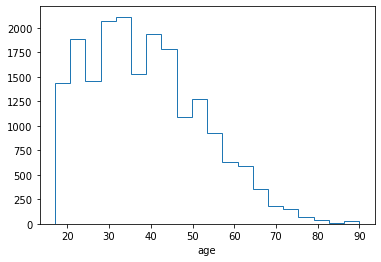

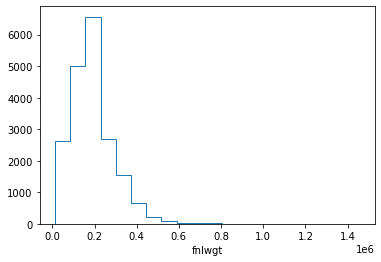

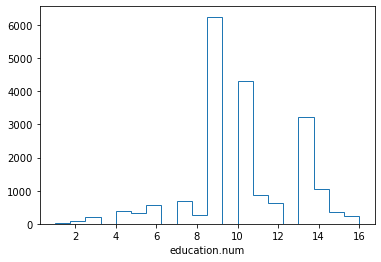

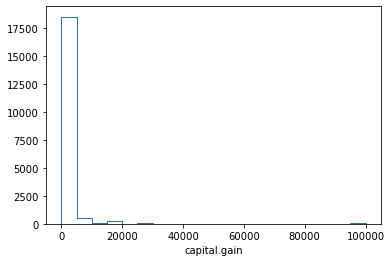

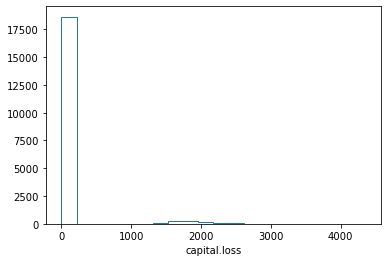

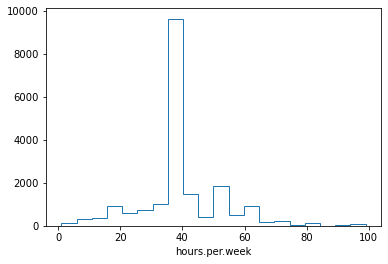

In [12]:
for i in train_df_nan.describe().columns:
    plt.hist(train_df_nan[i],histtype='step',bins=20)
    plt.xlabel(i)
    plt.show()

* Age features seem relevant for the given prediction task

### 2.2 Identify transformations to apply
rubric={points:18}

**Your tasks:**
1. Identify the sequence of transformations that you would apply on each column in the dataset and fill in the table below accordingly. An example of the sequence of transformations to be applied on the `occupation` feature is shown in the table below. You may decide not to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. 
2. Are there common transformations you would like to apply on certain types of features? Identify different feature types for applying different transformations. In particular, fill in the lists below. 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. 

> Note: This question is a bit open-ended and there is no single correct solution.

In [13]:
for i in train_df_nan.columns:
    print(train_df_nan[i].value_counts())

34    550
33    545
31    530
37    529
28    520
     ... 
84      5
83      4
85      2
88      1
86      1
Name: age, Length: 72, dtype: int64
Private             13570
Self-emp-not-inc     1550
Local-gov            1278
State-gov             780
Self-emp-inc          679
Federal-gov           559
Without-pay             8
Never-worked            4
Name: workclass, dtype: int64
126675    9
203488    9
113364    9
148995    8
120277    8
         ..
381618    1
29437     1
205296    1
141626    1
238192    1
Name: fnlwgt, Length: 14801, dtype: int64
9     6256
10    4326
13    3224
14    1046
11     864
7      694
12     627
6      581
4      390
15     355
5      325
8      274
16     250
3      205
2       88
1       31
Name: education.num, dtype: int64
Married-civ-spouse       9025
Never-married            6364
Divorced                 2682
Separated                 605
Widowed                   585
Married-spouse-absent     261
Married-AF-spouse          14
Name: marital.status, 

| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, OHE |
| age | Scaling |
| workclass | imputation |
| fnlwgt | Scaling |
| education | drop |
| education.num | OrdinalEncoding |
| marital.status | OHE |
| relationship | OHE |
| race | OHE |
| sex | OHE(binary) |
| capital.gain | Scaling |
| capital.loss | Scaling |
| hours.per.week | Scaling |
| native.country | imputation,OHE |


In [14]:
# Fill in the lists below. 
# It's OK to keep some of the lists empty or add new lists. 
numeric_features = ['age','fnlwgt','capital.gain','capital.loss','hours.per.week']
categorical_features = ['workclass','marital.status','occupation','relationship','native.country']
ordinal_features = ['education.num']
binary_features = ['sex']
drop_features = ['education','race']
null_features = ['occupation','workclass','native.country']
passthrough_features = []
target = "income"

race feature is not important for predicting income so it is not good idea to keep race feature in predicting.

<br><br>

### 2.3 Separating feature vectors and targets  
rubric={points:4}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. 
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not?

In [15]:
X_train, y_train = (
    train_df_nan.drop(columns=["income"]),
    train_df["income"],
)
X_test, y_test = (
    test_df_nan.drop(columns=["income"]),
    test_df["income"],
)

<br><br><br><br>

## Exercise 3: Preprocessing <a name="3"></a>
<hr>

### 3.1 Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**Your tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data from 2.2. 
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? 
3. Why do we need to use a column transformer in this case? Briefly explain. 

In [16]:
ct = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse=False,handle_unknown="ignore")),
        categorical_features,
    ),  # OHE on categorical features
    (
        StandardScaler(),
        numeric_features
    ), # scaling on numeric features
    
    (
        OrdinalEncoder(dtype=int),
        ordinal_features,
    ),  # Ordinal encoding on ordinal features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_features,
    ),  # OHE on categorical features
)

In [17]:
# from sklearn import set_config
# set_config(display="diagram")

In [18]:
ct

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['workclass', 'marital.status', 'occupation',
                                  'relationship', 'native.country']),
                                ('standardscaler', StandardScaler(),
                                 ['age', 'fnlwgt', 'capital.gain',
                                  'capital.loss', 'hours.per.week']),
                                ('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'int'>),
                                 ['education.num']),
                             

In [19]:
ct.fit(X_train)
X_transformed = ct.transform(X_train)
X_transformed.shape

(19536, 83)

<br><br><br><br>

## Exercise 4: Building models <a name="4"></a>
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

In [20]:
results_dict = {} # dictionary to store all the results

In [21]:

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [22]:
column_names = (
      ct.named_transformers_['pipeline']['onehotencoder'].get_feature_names().tolist()
    + numeric_features
    + ordinal_features
    + ct.named_transformers_["onehotencoder"].get_feature_names().tolist()
)
len(column_names)

C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


83

In [23]:
X_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.44595072,
         3.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.44595072,
        10.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.20413844,
         8.        ,  1.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.04293026,
         8.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.76311065,
         9.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.76311065,
         8.        ,  1.        ]])

In [24]:
X_train_transformed = pd.DataFrame(X_transformed, columns=column_names)

In [25]:
X_train_transformed.head()

,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_Divorced,x1_Married-AF-spouse,...,x4_United-States,x4_Vietnam,x4_Yugoslavia,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num,x0_Male
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.190089,0.536275,-0.146378,-0.21506,-0.445951,3.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.923301,-0.524114,-0.146378,-0.21506,-0.445951,10.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.996622,-0.760159,-0.146378,-0.21506,-0.204138,8.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.143264,-0.552827,-0.146378,-0.21506,-0.042930,8.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.849979,0.036757,-0.146378,-0.21506,-0.042930,8.0,1.0


In [26]:
knn_pipe = make_pipeline(ct, KNeighborsClassifier())
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(

In [27]:
svc_pipe = make_pipeline(ct, SVC())
svc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(

In [28]:
results_dict['KNN'] = mean_std_cross_val_scores(knn_pipe, X_train, y_train, return_train_score=True)

In [29]:
results_dict

{'KNN': fit_time       0.076 (+/- 0.037)
 score_time     2.419 (+/- 0.756)
 test_score     0.833 (+/- 0.004)
 train_score    0.883 (+/- 0.001)
 dtype: object}

<br><br>

### 4.1 Baseline model 
rubric={points:6}

**Your tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier.  
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [30]:
dc_pipe = make_pipeline(ct,DummyClassifier(strategy='prior'))
dc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(

In [31]:
results_dict['DC'] = mean_std_cross_val_scores(dc_pipe, X_train, y_train, return_train_score=True)

In [32]:
pd.DataFrame(results_dict)

,KNN,DC
fit_time,0.076 (+/- 0.037),0.087 (+/- 0.006)
score_time,2.419 (+/- 0.756),0.027 (+/- 0.007)
test_score,0.833 (+/- 0.004),0.760 (+/- 0.000)
train_score,0.883 (+/- 0.001),0.760 (+/- 0.000)


<br><br>

### 4.2 Trying different classifiers
rubric={points:14}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. 
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one?  

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [33]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

In [34]:
dtc_pipe = make_pipeline(ct,DecisionTreeClassifier())
dtc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(

In [35]:
results_dict['DTC'] = mean_std_cross_val_scores(dtc_pipe, X_train, y_train, return_train_score=True)

In [36]:
results_dict['SVC'] = mean_std_cross_val_scores(svc_pipe, X_train, y_train, return_train_score=True)

In [37]:
pd.DataFrame(results_dict)

,KNN,DC,DTC,SVC
fit_time,0.076 (+/- 0.037),0.087 (+/- 0.006),0.351 (+/- 0.016),12.648 (+/- 1.200)
score_time,2.419 (+/- 0.756),0.027 (+/- 0.007),0.031 (+/- 0.001),4.597 (+/- 0.560)
test_score,0.833 (+/- 0.004),0.760 (+/- 0.000),0.818 (+/- 0.007),0.852 (+/- 0.006)
train_score,0.883 (+/- 0.001),0.760 (+/- 0.000),1.000 (+/- 0.000),0.854 (+/- 0.002)


<br><br>

### (optional) 4.3 Exploring importance of scaling
rubric={points:1}

In this exercise you'll examine whether scaling helps in case of KNNs and SVM RBFs. 

**Your tasks:**

1. Create a column transformer without the `StandardScaler` step for `numeric_features`. 
2. Repeat the steps in 4.2 with this new column transformer. 
3. Compare the results of scaled numeric features with unscaled numeric features. Is scaling necessary for decision trees? Why or why not?

In [38]:
ct1 = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse=False,handle_unknown="ignore")),
        categorical_features,
    ),  # OHE on categorical features
    (
#         StandardScaler(),
        'passthrough',
        numeric_features
    ), # scaling on numeric features
    
    (
        OrdinalEncoder(dtype=int),
        ordinal_features,
    ),  # Ordinal encoding on ordinal features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_features,
    ),  # OHE on categorical features
)

In [39]:
ct1.fit(X_train)
X_transformed1 = ct1.transform(X_train)
X_transformed1.shape

(19536, 83)

In [40]:
column_names1 = (
      ct.named_transformers_['pipeline']['onehotencoder'].get_feature_names().tolist()
    + numeric_features
    + ordinal_features
    + ct.named_transformers_["onehotencoder"].get_feature_names().tolist()
)
len(column_names1)

C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


83

In [41]:
dtc_pipe1 = make_pipeline(ct1,DecisionTreeClassifier())
dtc_pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('passthrough', 'passthrough',
                                                  ['a

In [42]:
knn_pipe1 = make_pipeline(ct1, KNeighborsClassifier())
knn_pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('passthrough', 'passthrough',
                                                  ['a

In [43]:
svc_pipe1 = make_pipeline(ct1, SVC())
svc_pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('passthrough', 'passthrough',
                                                  ['a

In [44]:
results_dict1 = {}

In [45]:
results_dict1['DTC'] = mean_std_cross_val_scores(dtc_pipe1, X_train, y_train, return_train_score=True)
results_dict1['SVC'] = mean_std_cross_val_scores(svc_pipe1, X_train, y_train, return_train_score=True)
results_dict1['KNN'] = mean_std_cross_val_scores(knn_pipe1, X_train, y_train, return_train_score=True)

In [46]:
pd.DataFrame(results_dict1)

,DTC,SVC,KNN
fit_time,0.332 (+/- 0.027),14.637 (+/- 1.378),0.080 (+/- 0.008)
score_time,0.032 (+/- 0.010),5.974 (+/- 0.249),2.693 (+/- 0.103)
test_score,0.817 (+/- 0.006),0.789 (+/- 0.001),0.774 (+/- 0.003)
train_score,1.000 (+/- 0.000),0.789 (+/- 0.000),0.830 (+/- 0.002)


Ans 3. `Scaling is not important for decision tree as they are not sensitive to variance of the data and it uses a rule-based approach instead of calculation of distances. In decision tree Split is not affected by other features in dataset.`

### 4.4 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this might take a while. 

In [47]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}

In [48]:
best_score = 0

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

results_dict = {"C": [], "mean_cv_score": []}


for C in param_grid["C"]:  # for each combination of parameters, train an SVC
    pipe_svm = make_pipeline(ct, SVC(C=C))
    scores = cross_val_score(pipe_svm, X_train, y_train)  # perform cross-validation
    mean_score = np.mean(scores)  # compute mean cross-validation accuracy
    if (mean_score > best_score):  # if we got a better score, store the score and parameters
        best_score = mean_score
        best_parameters = {"C": C}
    results_dict["C"].append(C)
    results_dict["mean_cv_score"].append(mean_score)

In [49]:
results_dict

{'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'mean_cv_score': [0.7596744446560632,
  0.7835789841554106,
  0.8393737692025363,
  0.8515564536685722,
  0.8536038771446364,
  0.855036966167593]}

In [50]:
pd.DataFrame(results_dict)

,C,mean_cv_score
0,0.001,0.759674
1,0.010,0.783579
2,0.100,0.839374
3,1.000,0.851556
4,10.000,0.853604
5,100.000,0.855037


`hyperparameter C = 100 is best which is different from default value`

<br><br><br><br>

## Exercise 5: Evaluating on the test set <a name="5"></a>
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 5.1 Scoring on the unseen test set 
rubric={points:10}

**Your tasks:**

1. Train the best performing model on the entire training set. 
2. Report the results of this model on `X_test`. 
3. Are the cross-validation results and test results consistent? 

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
dtc_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(

In [52]:
y_pred = dtc_pipe.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.8135124760076775

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      9879
        >50K       0.61      0.62      0.62      3146

    accuracy                           0.81     13025
   macro avg       0.75      0.75      0.75     13025
weighted avg       0.81      0.81      0.81     13025



`cross-validation results and test results are consistent`

<br><br><br><br>

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](eva-well-done.png)

